# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

## PCA Image Compression

In [ ]:
#@title Case Study Walkthrough
#@markdown PCA Image Compression
from IPython.display import HTML

HTML("""<video width="320" height="240" controls>
  <source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_b7_hyd/preview_videos/image_compression_using_pca.mp4">
</video>
""")

Image compression with principal component analysis is a frequently used application of the dimension reduction technique. We know that an image is a matrix of pixels representing RGB color intensity values. Principal component analysis can be used to reduce the dimensions of this matrix (image) and **project back the data from the reduced space to reconstruct the image**. The objective of this experiment is to visualize the image compression which is an application of PCA. Here, we will see an example with an image of a Butterfly.

## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [4]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U2W9_CS_PCA_Image_Compression_Decompression" #name of the notebook
Answer = "Ungraded"
def setup():
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/CaseStudies/PCA_Compression_App.zip")
    ipython.magic("sx unzip PCA_Compression_App.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


###Importing the required packages

In [5]:
import cv2 as cv
from matplotlib import pyplot as plt
import pca_img_compression as pca
import numpy as np

###Visualizing the butterfly image

The below is the code for visualization of a Butterfly image for which we apply our PCA compression and decompression technique. 

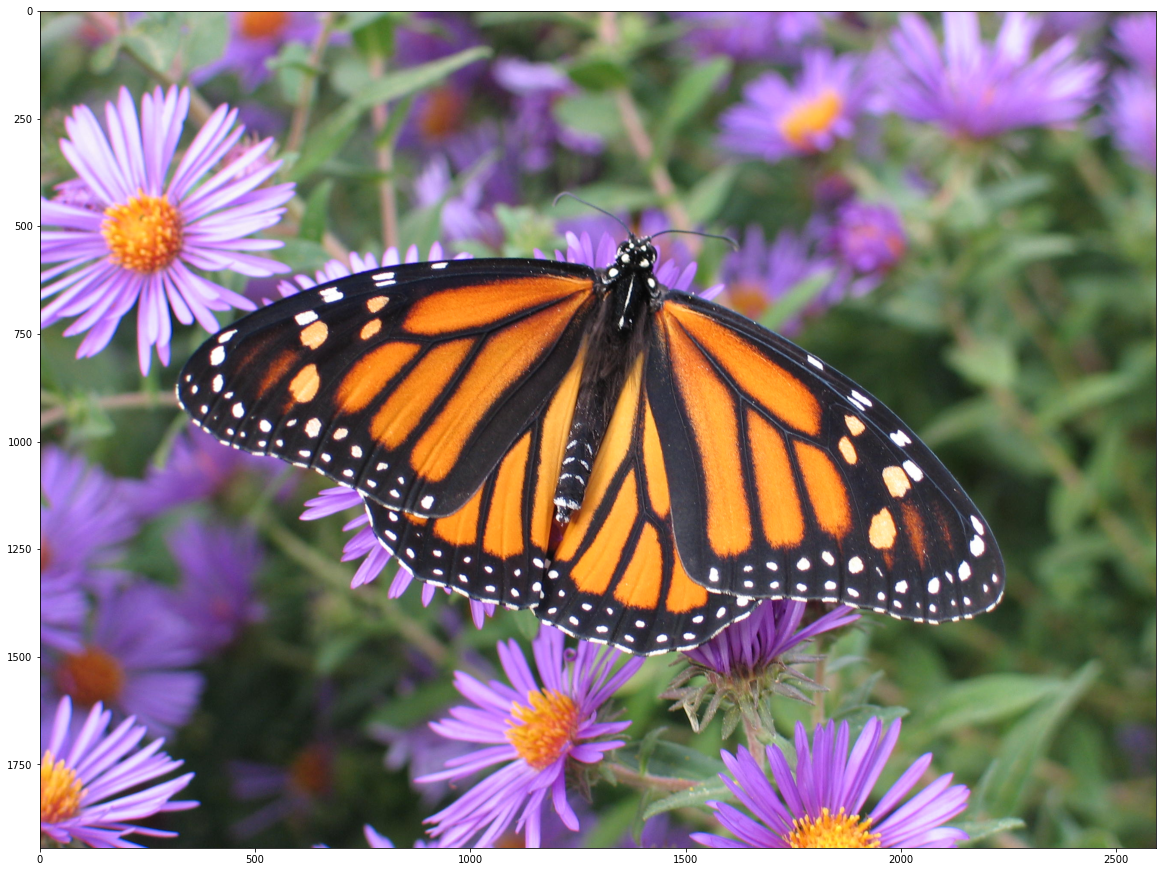

In [6]:
img_name = "Butterfly2"
bf = cv.imread(img_name + ".jpeg")
plt.figure(figsize=(20,20))
plt.grid(False)
plt.imshow(cv.cvtColor(bf, cv.COLOR_BGR2RGB))
plt.show()

###Defining three types of errors

The below code block defines three types of errors for original and reconstructed image

Squared error = $\sum_{i=1}^{N}\frac{(y_{i} -y_{i}^{'} )^{2}}{N}$

Linear error =$\sum_{i=1}^{N}\frac{|(y_{i} -y_{i}^{'} )|}{N}$


Maximal error = $max(|(y_{i}-y_{i}^{'})|)$ $\forall  i = 1,...,N$


In [8]:
def recover_square_error(img, recovered_img):
    return np.around(np.average(np.square(img.astype("float32") - recovered_img.astype("float32"))), decimals=2)


def recover_linear_error(img, recovered_img):
    return np.around(np.average(np.abs(img.astype("float32") - recovered_img.astype("float32"))), decimals=2)


def recover_max_error(img, recovered_img):
    return np.max(np.abs(img.astype("int32")-recovered_img.astype("int32")))

The below function is to visualize the compressed images and analyse the required parameters. 

In [9]:
def compare_pca(img, pca_num_of_components, pca_square_side):
    pca_img, pca_compression_ratio, pca_space_savings = pca.compress(img, square_side=pca_square_side, num_of_components=pca_num_of_components, return_ratio=True)
    pca_recovered = pca.decompress(pca_img)
    pca_linear = recover_linear_error(img, pca_recovered)
    pca_square = recover_square_error(img, pca_recovered)
    pca_max = recover_max_error(img, pca_recovered)
    print("PCA Compression with squares of side " + str(pca_square_side) + " and " + str(pca_num_of_components) + " components:")
    print("Compression Ratio:", pca_compression_ratio)
    print("Space Savings:", str(pca_space_savings * 100) + "%")
    print("Mean Linear Error:", pca_linear)
    print("Mean Square Error:", pca_square)
    print("Maximal Error:", pca_max)
    return pca_recovered

Here, we can visualize that as the number of principal components used to project the new data decreases, the quality and representation compared to the original image gets affected.

This might take long time to execute

In [10]:
for i in [144, 60, 16, 6, 3]:
    compressed, compression_ratio, space_savings  = pca.compress(bf, square_side=12, num_of_components=i,return_ratio=True)
    decompressed = pca.decompress(compressed)
    plt.figure(figsize=(20,20))
    plt.grid(False)
    plt.title('Compression ratio: {} \n Space saving: {} \n components: {}'.format(compression_ratio, space_savings, i))
    plt.imshow(cv.cvtColor(decompressed, cv.COLOR_BGR2RGB))
    plt.show()
    cv.imwrite("Reconstructed_image_{}.png".format(str(i)), decompressed)
    compare_pca(bf,i, 12)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Please answer the questions below to complete the experiment:

In [12]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [11]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "If possible to show example of jpeg implementation " #@param {type:"string"}


In [13]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [14]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [15]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 8445
Date of submission:  31 Oct 2020
Time of submission:  14:19:27
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
